# テイラー展開

- モデルの任意の点近傍の振る舞いを近似する方法

# 用途

- 反復的にパラメータを更新するときに，どの方向にどのくらい変化させたらいいかを調べる

- 非線形モデルを線形モデルに近似する(拡張カルマンフィルタ)

# 式(2次の項まで)

- 1変数の場合

  関数$f(x)$を点$x_{a}$についてテイラー展開する場合

$$
f(x) = f(x_{a}) + \frac{d}{dx} f(x_{a})(x - x_{a}) + \frac{1}{2} \frac{d^{2}}{d^{2}x} f(x_{a}) (x - x_{a})^2 + \cdots
$$

- 多変数の場合

$$
f(\vec{x}) = f(\vec{x_{a}}) + \nabla f(\vec{x_{a}})(\vec{x} - \vec{x_{a}}) + \frac{1}{2} (\vec{x} - \vec{x_{a}})^{\mathrm{T}}\nabla^{2}f(\vec{x_{a}}) (\vec{x} - \vec{x_{a}}) + \cdots
$$

# 1変数の場合の例を見ていく

こんな式を考えよう

$$
f(x) = 3x^{3} + 2x^{2} - 5x + 9
$$

とりあえずプロット

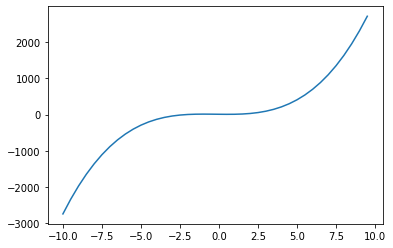

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

xs = [x for x in np.arange(-10., 10., 0.5)]
f = lambda x: 3. * x**3 + 2 * x**2 - 5 * x + 9
fxs = [f(x) for x in xs]

plt.plot(xs, fxs)
plt.show()

次に導関数を求める

$$
\frac{d}{dx} f(x) = 9x^{2} + 4x - 5
$$
$$
\frac{d^{2}}{d^{2}x} f(x) = 18x + 4
$$

$x_{a} = 5$とすると

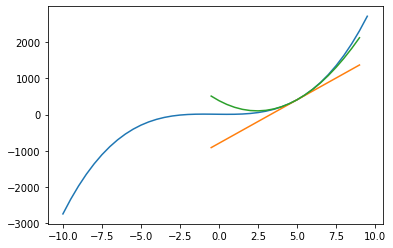

In [2]:
%matplotlib inline
# 導関数オブジェクト
dfdx = lambda x: 9. * x**2 + 4. * x - 5.
d2fd2x = lambda x: 18. * x + 4.

# テイラー展開(1次と2次)
xa = 5.
f_xa_dx_1 = lambda x, xa: f(xa) + dfdx(xa) * (x - xa)
f_xa_dx_2 = lambda x, xa: f_xa_dx_1(x, xa) + 0.5 * d2fd2x(xa) * (x - xa)**2

# 出力
f_xa_dx_1_out = [f_xa_dx_1(x, xa) for x in xs[19:39]]
f_xa_dx_2_out = [f_xa_dx_2(x, xa) for x in xs[19:39]]

plt.plot(xs, fxs)
plt.plot(xs[19:39], f_xa_dx_1_out)
plt.plot(xs[19:39], f_xa_dx_2_out)
plt.show()

見てわかるように，$x = x_{a}$近傍では，もとの式をよく近似していることがわかる

# 多変量の場合を見ていく

数式を再掲

$$
f(\vec{x}) = f(\vec{x_{a}}) + \nabla f(\vec{x_{a}})(\vec{x} - \vec{x_{a}}) + \frac{1}{2} (\vec{x} - \vec{x_{a}})^{\mathrm{T}}\nabla^{2}f(\vec{x_{a}}) (\vec{x} - \vec{x_{a}}) + \cdots
$$

$\nabla$は勾配ベクトルを作るための演算子

$$
\nabla = \left(
    \begin{array}{ccc}
        \frac{\partial}{\partial x_{1}} & \frac{\partial}{\partial x_{2}} & \cdots & \frac{\partial}{\partial x_{N}}
    \end{array}
\right)
$$

$\nabla^{2}$はヘッセ行列を作るための演算子

$$
\nabla^{2} = \left(
    \begin{array}{ccc}
        \frac{\partial^{2}}{\partial x_{1}\partial x_{1}} & \frac{\partial^{2}}{\partial x_{1}\partial x_{2}} & \cdots & \frac{\partial^{2}}{\partial x_{1}\partial x_{N}} \\
        \frac{\partial^{2}}{\partial x_{2}\partial x_{1}} & \frac{\partial^{2}}{\partial x_{2}\partial x_{2}} & \cdots & \frac{\partial^{2}}{\partial x_{2}\partial x_{N}} \\
        \vdots & \vdots & \ddots & \vdots \\
        \frac{\partial^{2}}{\partial x_{N}\partial x_{1}} & \frac{\partial^{2}}{\partial x_{N}\partial x_{2}} & \cdots & \frac{\partial^{2}}{\partial x_{N}\partial x_{N}}
    \end{array}
\right)
$$

計算していく

$\vec{x} = (x, y)$として

$$
f(x, y) = x^{3} + x^{2} + x + 2xy + y + y^{2} + y^{3} + 1
$$

を使って計算と描画をしていく

<IPython.core.display.Javascript object>


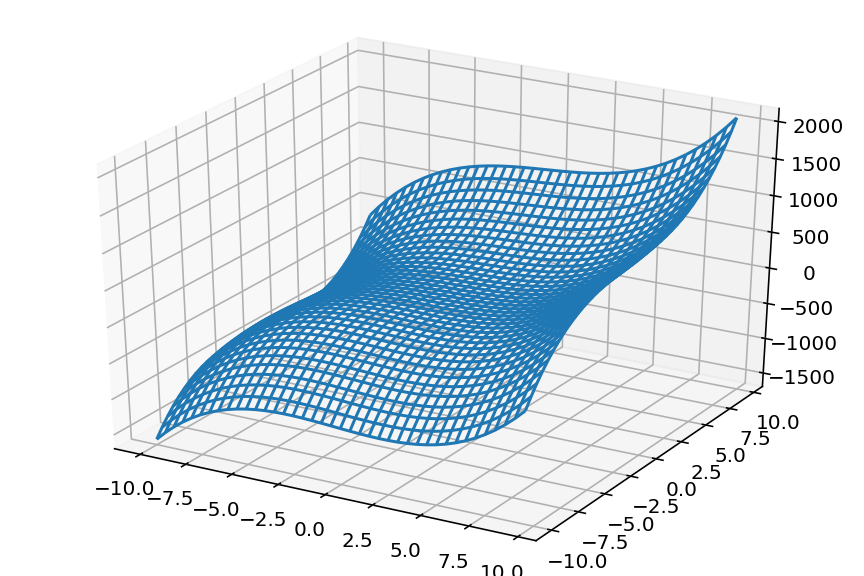

In [5]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

xs = np.array(np.arange(-10., 10., 0.5))
ys = np.array(np.arange(-10., 10., 0.5))

X, Y = np.meshgrid(xs, ys)
f = lambda x, y: x**3 + y**3 + x**2 + y**2 + x + y + 2. * x * y + 1.
Z = np.array([f(x, y) for x, y in zip(X, Y)])

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X,Y,Z)

plt.show()

導関数を求め，ヘッセ行列を作る

$$
\begin{eqnarray}
\frac{\partial f}{\partial x} & = & 3x^{2} + 2x + 2y + 1 \\
\frac{\partial^{2} f}{\partial x \partial x} & = & 6x + 2 \\
\frac{\partial^{2} f}{\partial x \partial y} & = & 2 \\
\frac{\partial f}{\partial y} & = & 2x + 2y + 3y^{2} + 1 \\
\frac{\partial^{2} f}{\partial y \partial x} & = & 2 \\
\frac{\partial^{2} f}{\partial y \partial y} & = & 6y + 2 \\
\nabla^{2}f & = & \left(
    \begin{array}{ccc}
        6x + 2 & 2 \\
        2 & 6y + 2
    \end{array}
\right)
\end{eqnarray}
$$

$\vec{x_{a}} = (5, 5)$周りでテイラー展開する

<IPython.core.display.Javascript object>


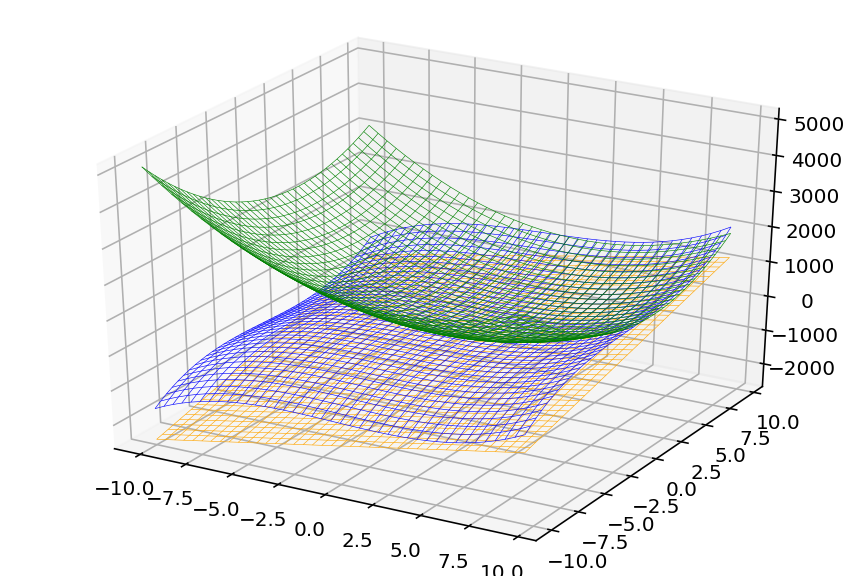

In [6]:
%matplotlib notebook
dfdx = lambda x, y: 3. * x**2 + 2. * x + 2. * y + 1.
dfdy = lambda x, y: 3. * y**2 + 2. * x + 2. * y + 1.
nablaf = lambda x, y: np.array([dfdx(x, y), dfdy(x, y)])

d2fdxdx = lambda x, y: 6. * x + 2.
d2fdxdy = lambda x, y: 2.
d2fdydx = lambda x, y: 2.
d2fdydy = lambda x, y: 6. * y + 2.
Hf = lambda x, y: np.array([[d2fdxdx(x, y), d2fdxdy(x, y)], [d2fdydx(x, y), d2fdydy(x, y)]])

xa = np.array([[5.], [5.]])
te1 = lambda xv, xva: f(xva[0, 0], xva[1, 0]) + nablaf(xva[0, 0], xva[1, 0]) @ (xv - xva)
te2 = lambda xv, xva: te1(xv, xva) + 0.5 * (xv - xva).T @ Hf(xva[0,0], xva[1,0]) @ (xv - xva)

Z1 = np.array([
    te1(np.array([[x], [y]]), xa)
    for xe, ye in zip(X, Y)
    for x, y in zip(xe, ye)
]).reshape([40, 40])
Z2 = np.array([
    te2(np.array([[x], [y]]), xa)
    for xe, ye in zip(X, Y)
    for x, y in zip(xe, ye)
]).reshape([40, 40])

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X,Y,Z, color='blue', linewidth=0.3)
ax.plot_wireframe(X,Y,Z1, color='orange', linewidth=0.3)
ax.plot_wireframe(X,Y,Z2, color='green', linewidth=0.3)

plt.show()

ちゃんと$(5, 5)$で接曲面と接平面が重なっているように見える